### 06.08

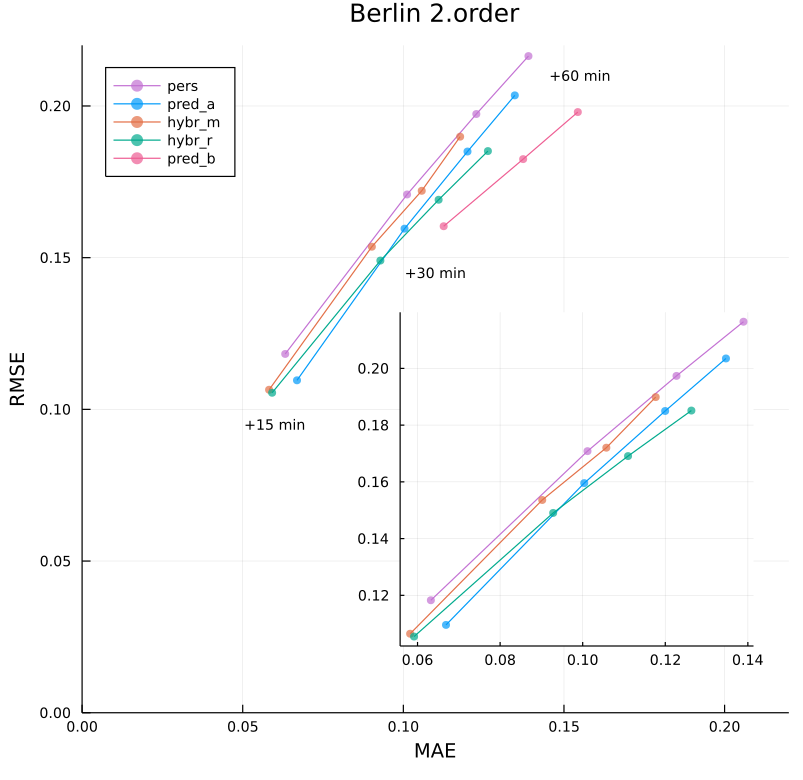

In [71]:
bb = bbox(0.45, 0.4, 0.5, 0.5)
plot!([maes_pers maes_pred maes_hyb maes_hyb_r], [rmses_pers rmses_pred rmses_hyb rmses_hyb_r], marker=(0.7, stroke(0)), 
    c=[4 1 2 9], leg=:none, inset=(1, bb), subplot=2)
# plot!(maes_pred_n, rmses_pred_n, c=7, marker=(0.7, stroke(0)), inset=(1, bb)) #, subplot=2)

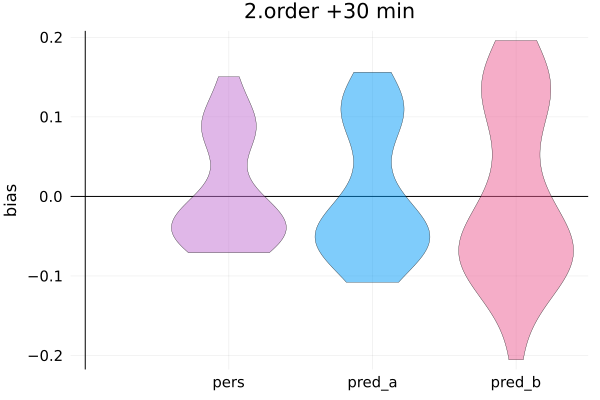

In [26]:
v = violin([bias_pers bias_pred bias_pred_n], c=[4 1 7], fillalpha=0.5, lw=0.3, leg=false, frame=:zerolines, 
        xticks=(1:3, ["pers" "pred_a" "pred_b"]), tickfontsize=10, ylabel="bias", title="2.order +30 min")

### 13.08

#### mean CMF

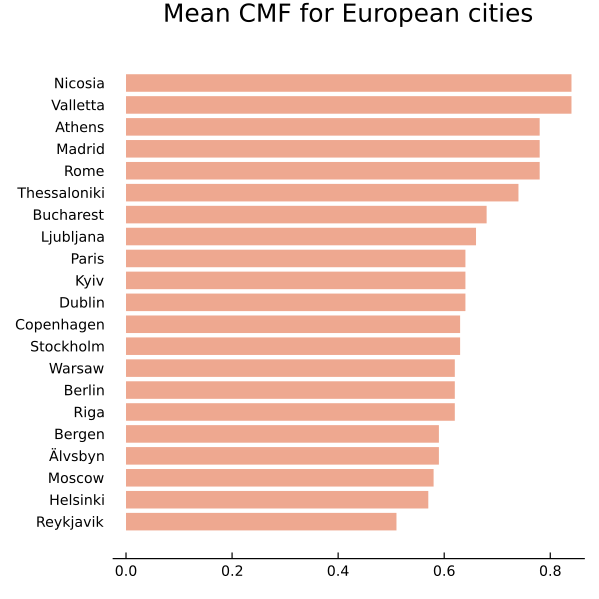

In [5]:
b1 = bar(df1.city, df1.cmf, leg=false, orientation=:horizontal, 
    lw=0, w=0, c=2, alpha=0.6, size=(500, 500), 
    grid=false, yflip=true, yaxis=false, yticks=(0.5:1:21.4, df1.city),
    title="Mean CMF for European cities")

#### transition matrix
- transition prob from 2004-2018

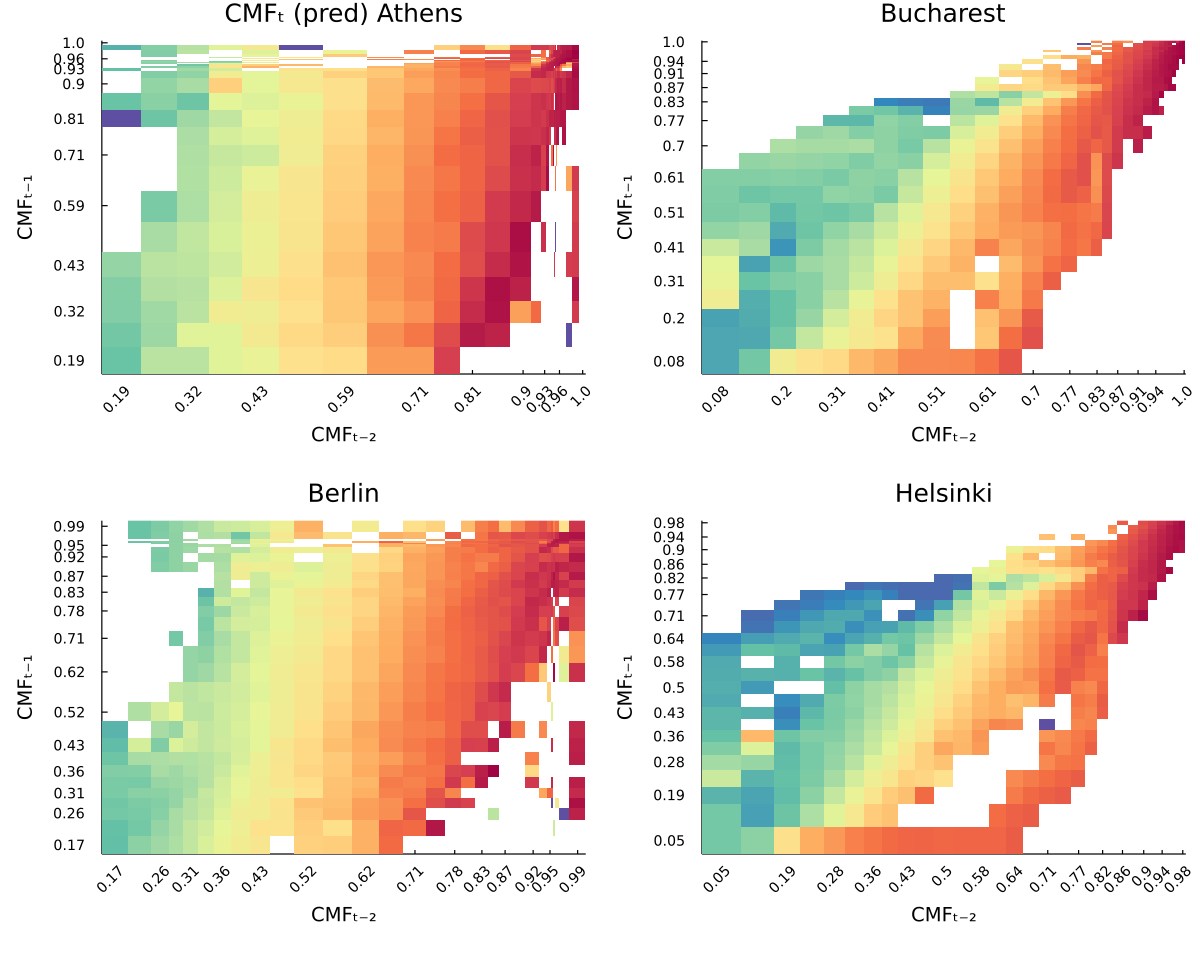

In [12]:
p = plot(hm_at, hm_bu, hm_be, hm_he, layout=@layout([a b; c d]), grid=false, size=(1000, 800), 
        title=["CMFₜ (pred) Athens" "Bucharest" "Berlin" "Helsinki"], xrotation=45, 
        xlabel="CMFₜ₋₂", ylabel="CMFₜ₋₁", leftmargin=20px, bottommargin=20px)

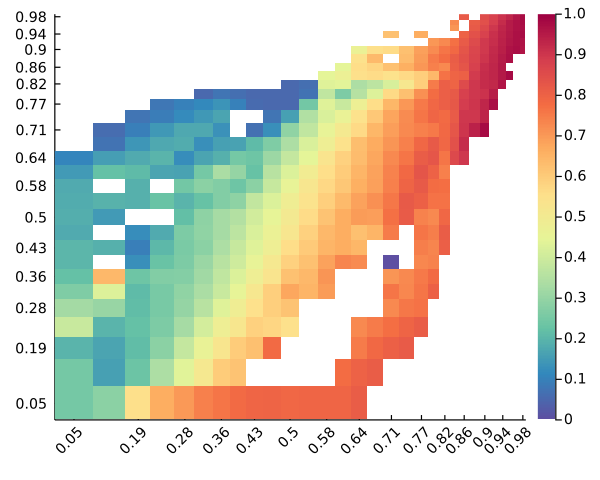

In [13]:
hm_he = heatmap(binMean_he, binMean_he, T_he, c=cgrad(:Spectral_10, rev=true), clim=(0,1), grid=false, xrotation=45, size=(500,400), #leg=:none, #fmt=:png, dpi=100, 
    xticks=xti_he, yticks=xti_he)

#### stats mn ± sd
- test year 2019, +2 steps to include pred_n, though stats essentially same for +1 ~ +4 steps
- divide into odd days: compute MAE & RMSE
- even days: apply hybrid method based on errors
- Alternative: trans prob from 2004-2017, compute 2018 errors, apply hybrid for 2019 and eval

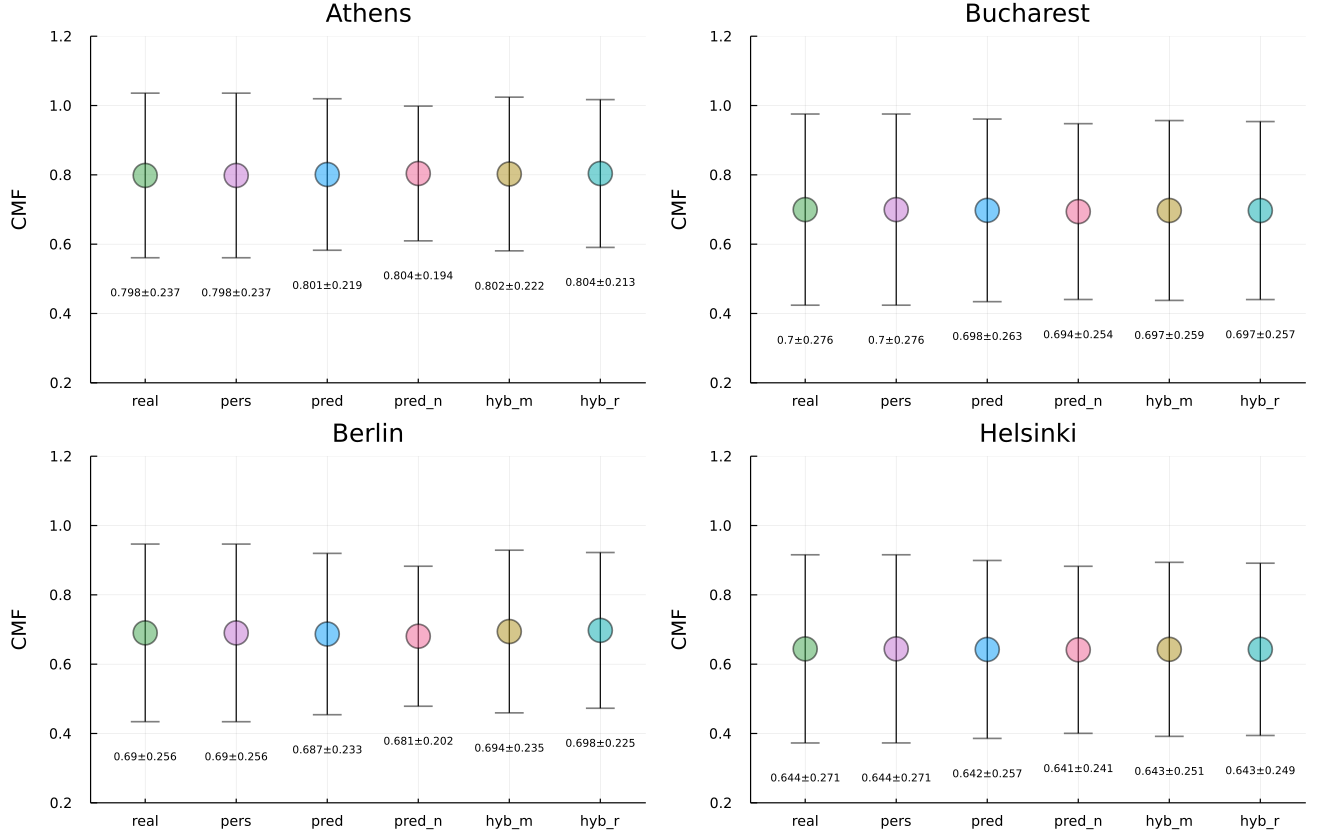

In [51]:
s_at = viz_mn_sd_city(fn_athens)
s_bu = viz_mn_sd_city(fn_bucharest)
s_be = viz_mn_sd_city(fn_berlin)
s_he = viz_mn_sd_city(fn_helsinki)

sca = plot(s_at, s_bu, s_be, s_he, layout=@layout([a b; c d]), size=(1100, 700), leftmargin=20px)

#### bias range

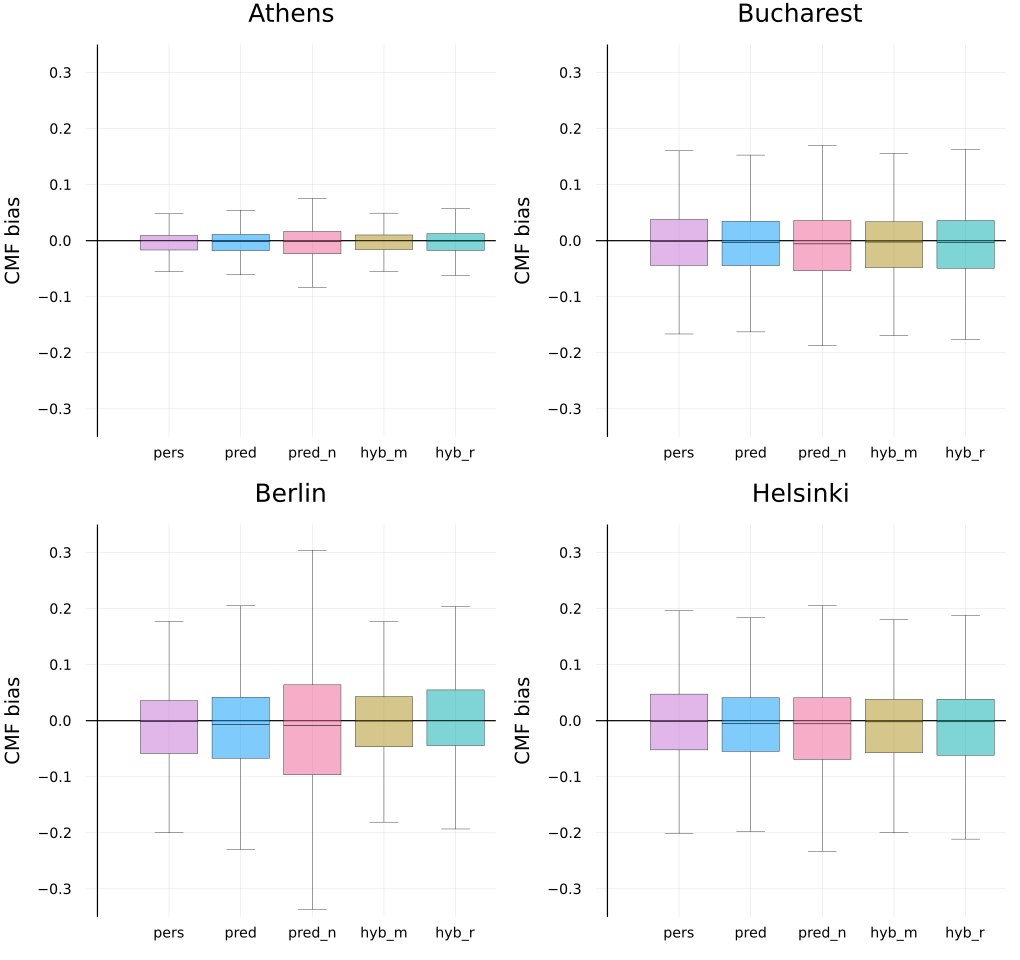

In [62]:
bx_bu = viz_bias_range_city(fn_bucharest)
bx_be = viz_bias_range_city(fn_berlin)
bx_he = viz_bias_range_city(fn_helsinki)

bxs = plot(bx_at, bx_bu, bx_be, bx_he, layout=@layout([a b; c d]), size=(850,800))

#### errors
- hybrid much better for Bucharest & Helsinki

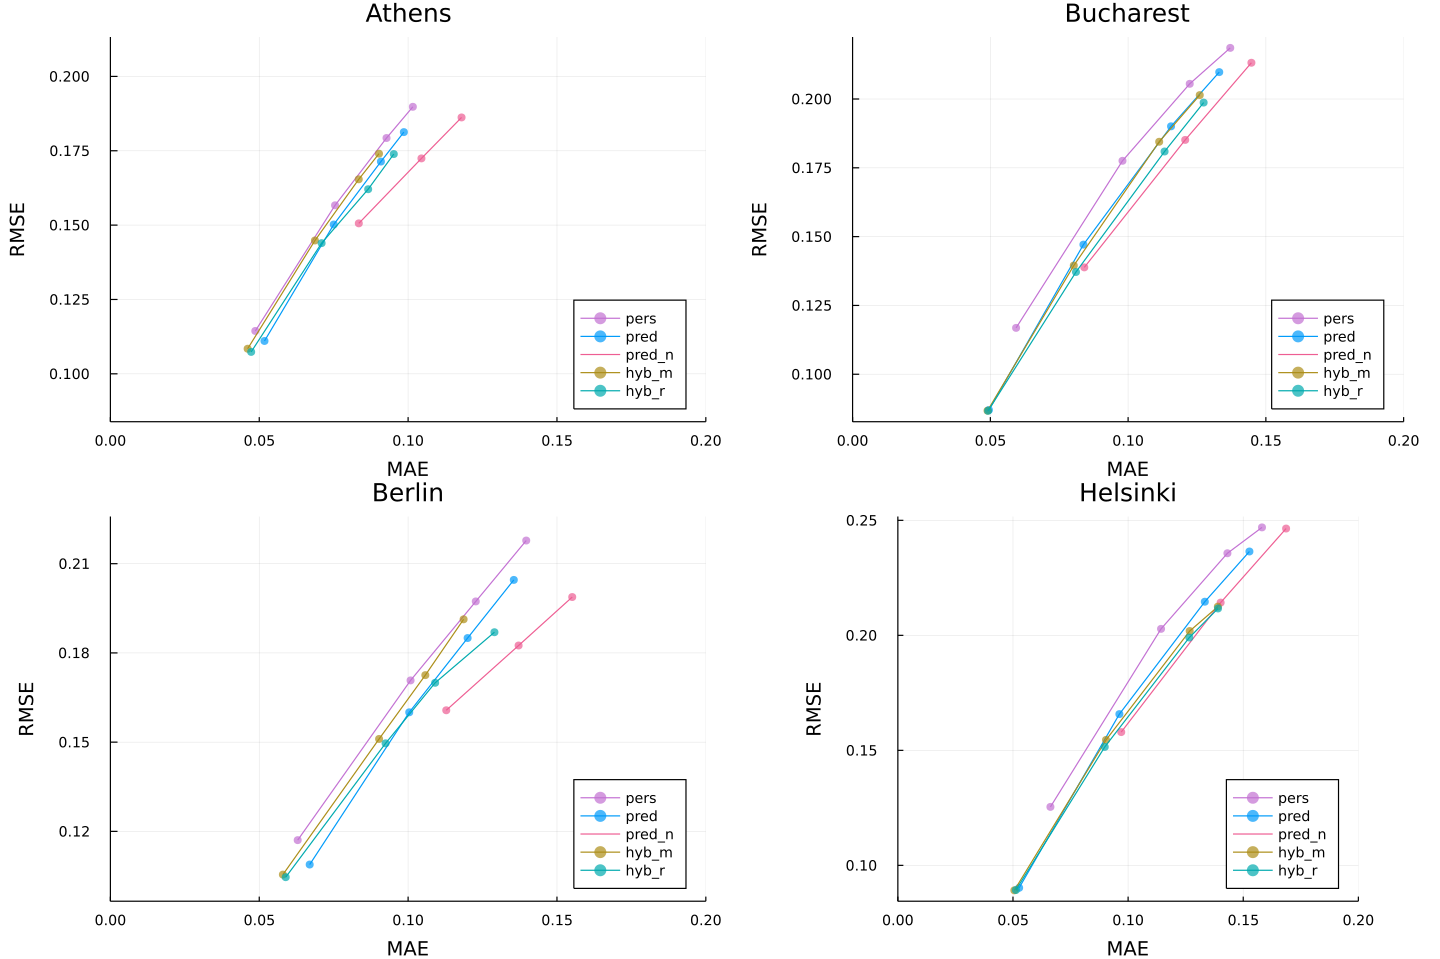

In [131]:
ps = plot(p_at, p_bu, p_be, p_he, layout=@layout([a b; c d]), aspect_ratio=1, leftmargin=20px, size=(1200,800))

#### dif vs bias

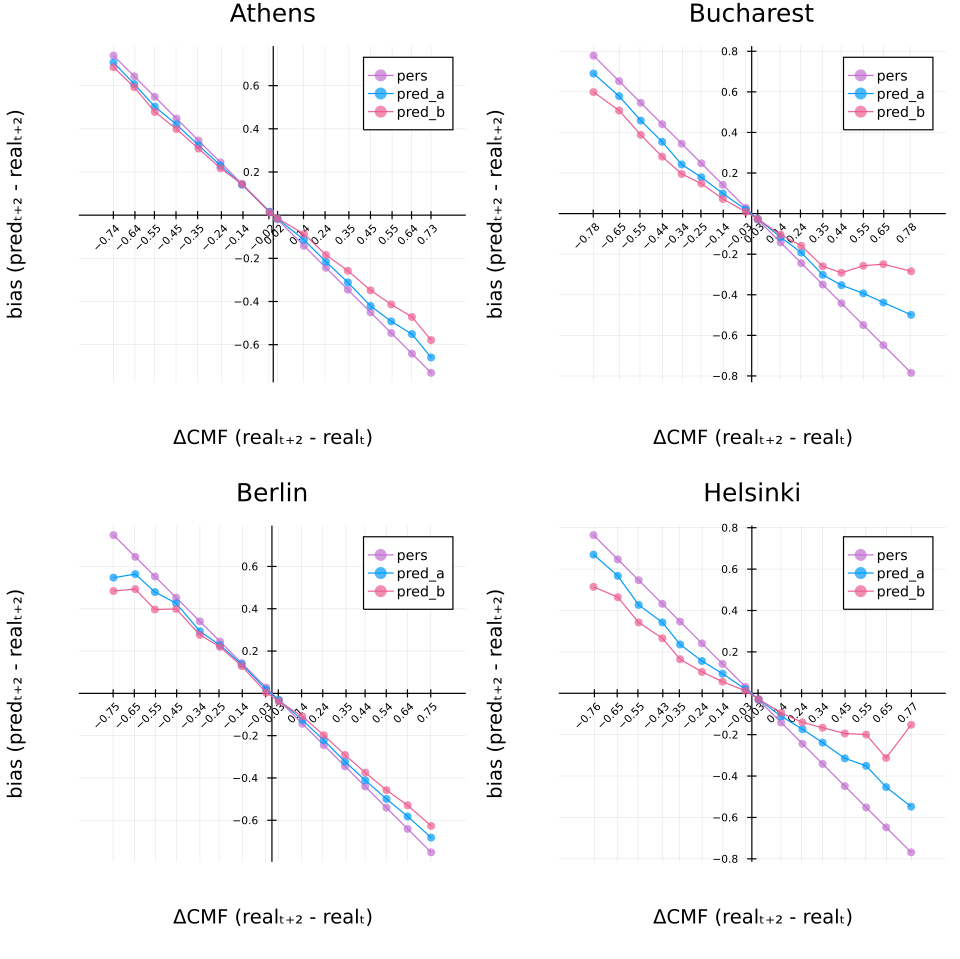

In [152]:
d_at = viz_dif_city(fn_athens)
d_bu = viz_dif_city(fn_bucharest)
d_be = viz_dif_city(fn_berlin)
d_he = viz_dif_city(fn_helsinki)

difs = plot(d_at, d_bu, d_be, d_he, layout=@layout([a b; c d]), size=(800,800))

- CMF => GHI from modelled GHI_CS?